In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from Bio.Seq import Seq
import re
from scipy.stats import spearmanr
import subprocess
import seaborn as sns
import os

In [7]:
DATADIR = '/Users/xuanyuanqiao/Desktop/analysis'
FILENAME = DATADIR + 'BSUB_trimmed_parsed_samples.txt'
os.chdir(DATADIR)
#  TCGAGCTC..GAGAAG	2307	t0	glucosrep1	2-1-LCK8112
col_names = ['Sequence','NReads','carbon','rep','T']
df = pd.read_csv('BSUB_trimmed_parsed_samples.txt',sep='\t',names=col_names,dtype={'Sequence':str,'NReads':int,'T':'category','carbon':'category','rep':'category'})
df.set_index(['T','carbon','rep'],drop=True,inplace=True)
#df = df[df.NReads>5]
df.head()

Sequence  NReads
T  carbon rep                                                            
t2 Ara    rep2  TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...    7345
          rep2  TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...    7141
          rep2  TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...    6845
          rep2  TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...    6606
          rep2  TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...    6558

In [8]:
df

Sequence  NReads
T  carbon rep                                                            
t2 Ara    rep2  TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...    7345
          rep2  TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...    7141
          rep2  TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...    6845
          rep2  TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...    6606
          rep2  TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...    6558
...                                                           ...     ...
   Glu    rep1  TAACATAGATGTGTAAAAGAGACAGCACTTAATCGCCGGCCCGGCA...       1
          rep1  TAACATAGATGTGTATAAGAGACAGGCACACGATTGCCTATCAATT...       1
          rep1  TAACATAGATGTGTATAAGAGACAGATATGTAGAAAACGCATCAAA...       1
          rep1  TAACATAGATGTGTATAAGAGACAGGTCCGATGCCGACCTTAGTGG...       1
          rep1  TAACATAGATGTGTATAAGAGACAGCTCTATCGTTAATACGTATTT...       1

[1640574 rows x 2 columns]

In [9]:
# merge dataframes to create an arabinose timecourse
t0 = df.loc[('t0','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'t0'})
t1a1 = df.loc[('t1','Ara','rep1')].reset_index(drop=True).rename(columns={'NReads':'t1_r1'})
t1a2 = df.loc[('t1','Ara','rep2')].reset_index(drop=True).rename(columns={'NReads':'t1_r2'})
t2a1 = df.loc[('t2','Ara','rep1')].reset_index(drop=True).rename(columns={'NReads':'t2_r1'})
t2a2 = df.loc[('t2','Ara','rep2')].reset_index(drop=True).rename(columns={'NReads':'t2_r2'})
t3a1 = df.loc[('t3','Ara','rep1')].reset_index(drop=True).rename(columns={'NReads':'t3_r1'})
t3a2 = df.loc[('t3','Ara','rep2')].reset_index(drop=True).rename(columns={'NReads':'t3_r2'})

<ipython-input-9-d9f0467ab603>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  t0 = df.loc[('t0','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'t0'})
<ipython-input-9-d9f0467ab603>:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  t1a1 = df.loc[('t1','Ara','rep1')].reset_index(drop=True).rename(columns={'NReads':'t1_r1'})
<ipython-input-9-d9f0467ab603>:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  t1a2 = df.loc[('t1','Ara','rep2')].reset_index(drop=True).rename(columns={'NReads':'t1_r2'})
<ipython-input-9-d9f0467ab603>:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  t2a1 = df.loc[('t2','Ara','rep1')].reset_index(drop=True).rename(columns={'NReads':'t2_r1'})
<ipython-input-9-d9f0467ab603>:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  t2a2 = df.loc[('t2','Ara','rep2')].reset_index(drop=True).rename(columns={'NReads':'t2_r2'})


In [10]:
a = t0.merge(t2a1,on='Sequence',how='outer')
a = a.merge(t2a2,on='Sequence',how='outer')
a = a.merge(t1a1,on='Sequence',how='outer')
a = a.merge(t1a2,on='Sequence',how='outer')
a = a.merge(t3a1,on='Sequence',how='outer')
a = a.merge(t3a2,on='Sequence',how='outer')
a.fillna(0,inplace=True)
a.reset_index(drop=True,inplace=True)
# to integer
for cn in a.columns.values[1:]:
    a[cn] = a[cn].astype(int)

In [11]:
a

,Sequence,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2
0,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,4166,5191,7345,6339,5842,6012,7315
1,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,4166,5191,7345,6339,5842,6012,1
2,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,4166,5191,7345,6339,5842,6012,1
3,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,4166,5191,7345,6339,5842,6012,1
4,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,4166,5191,7345,6339,5842,6012,1
...,...,...,...,...,...,...,...,...
5864993,TAACATAGATGTGTATAATAGACAGAAATTGAACACGCCGGTCTTC...,0,0,0,0,0,0,1
5864994,TAACATAGATGTGTATAAGAGACAGGCTAAACACGAAACCAAGGTG...,0,0,0,0,0,0,1
5864995,TAACATATATGTGTATAAGAGACAGTACATGCTCTCTACCAAAAAA...,0,0,0,0,0,0,1
5864996,TAACATAGATGTGTATAAGAGACAGGTCGTTACGCCTGTCGGTGAA...,0,0,0,0,0,0,1


In [12]:
a['TotalReads'] = np.sum(a,axis=1)
a = a[a.TotalReads >= 100]
a = a[a.t0 >= 5]
a = a[a.t1_r1 >= 5]
a = a[a.t1_r2 >= 5]
a = a[a.t2_r1 >= 5]
a = a[a.t2_r2 >= 5]
a = a[a.t3_r1 >= 5]
a = a[a.t3_r2 >= 5]

In [13]:
a

,Sequence,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2,TotalReads
0,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,4166,5191,7345,6339,5842,6012,7315,42210
40320,TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...,4114,5087,6845,6109,5189,5992,6803,40139
242496,TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...,3892,4992,7141,6297,5560,5067,6959,39908
265536,TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...,3722,4867,6606,5598,5056,5222,6609,37680
293886,TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...,3675,4805,6558,5422,5125,5001,6294,36880
...,...,...,...,...,...,...,...,...,...
5300987,TAACATAGATGTGTATAAGAGACAGTAGTATCTGCAATCAGATGCA...,5,19,24,12,22,16,18,116
5300996,TAACATAGATGTGTATAAGAGACAGTCATACAGGAACATAGCCGCA...,5,30,40,18,38,26,38,195
5301000,TAACATAGATGTGTATAAGAGACAGTCCTCACGCCGCACCCGGGCG...,5,14,29,14,18,6,34,120
5301014,TAACATAGATGTGTATAAGAGACAGTGCTCAGGCTCCAATGAACCG...,5,11,24,25,27,23,22,137


In [46]:
a.reset_index(drop=True,inplace=True)

print(len(a))
#a.to_csv('arabinose_rep1.csv',sep=',',header=False,index=False,columns=['t0','t1_r1','t2_r1','t3_r1'])
#a.to_csv('arabinose_rep2.csv',sep=',',header=False,index=False,columns=['t0','t1_r2','t2_r2','t3_r2'])

#a.to_csv('arabinose.tab',sep='\t')

69711


In [42]:
import regex

In [43]:
if re.match('^ATG','TATGGGTATAAGAGACAGTGTTTCGACTTGATCAACGTTGGCGAGAT') == None:
    print("None")


None


In [30]:
print(len(fs1))
print(len(fs2))

69711
69711


In [27]:
fs1 = pd.read_csv('ara1_FitSeq.csv')
fs1['Estimated_Fitness'].sort_values()

63714   -0.241533
46608   -0.226778
27240   -0.221975
38824   -0.219972
50195   -0.213766
           ...   
69629    0.247580
69530    0.275762
69579    0.284804
62426    0.294854
68007    0.354585
Name: Estimated_Fitness, Length: 69711, dtype: float64

In [28]:
# read in Fit-Seq output
fs1 = pd.read_csv('ara1_FitSeq.csv')
fs2 = pd.read_csv('ara2_FitSeq.csv')
if len(fs1)==len(a):
    if len(fs2)==len(a):
        print('joining FitSeq...')
        a['Fitness_rep1'] = fs1['Estimated_Fitness']
        a['Fitness_rep2'] = fs2['Estimated_Fitness']
        a['Likelihood_Log_rep1'] = fs1['Likelihood_Log']
        a['Likelihood_Log_rep2'] = fs2['Likelihood_Log']

#a.to_csv('arabinose.tab',sep='\t')

joining FitSeq...


In [36]:
a = pd.read_csv('arabinose.tab',sep='\t',index_col=0)
a

,Sequence,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2,TotalReads,Fitness_rep1,Fitness_rep2,Likelihood_Log_rep1,Likelihood_Log_rep2
0,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,4166,5191,7345,6339,5842,6012,7315,42210,0.008256,0.007223,-19.642716,-19.717983
1,TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...,4114,5087,6845,6109,5189,5992,6803,40139,0.007144,-0.000588,-20.941606,-20.964442
2,TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...,3892,4992,7141,6297,5560,5067,6959,39908,0.006745,0.009020,-26.162821,-20.062389
3,TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...,3722,4867,6606,5598,5056,5222,6609,37680,0.005635,0.006831,-20.149052,-18.785987
4,TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...,3675,4805,6558,5422,5125,5001,6294,36880,0.002642,0.005391,-22.654317,-19.834928
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69706,TAACATAGATGTGTATAAGAGACAGTAGTATCTGCAATCAGATGCA...,5,19,24,12,22,16,18,116,0.066397,0.156968,-10.653719,-13.037824
69707,TAACATAGATGTGTATAAGAGACAGTCATACAGGAACATAGCCGCA...,5,30,40,18,38,26,38,195,0.152204,0.229665,-11.362062,-20.670054
69708,TAACATAGATGTGTATAAGAGACAGTCCTCACGCCGCACCCGGGCG...,5,14,29,14,18,6,34,120,0.036751,0.131809,-12.261328,-9.494229
69709,TAACATAGATGTGTATAAGAGACAGTGCTCAGGCTCCAATGAACCG...,5,11,24,25,27,23,22,137,0.187892,0.185551,-11.576616,-15.373453


In [37]:
# to fraction
for cn in a.columns.values[1:]:
    a[cn] = a[cn] / np.sum(a[cn])

a['t1'] = (a['t1_r1']+a['t1_r2'])/2
a['t2'] = (a['t2_r1']+a['t2_r2'])/2
a['t3'] = (a['t3_r1']+a['t3_r2'])/2

a['log2_t0_over_t1'] = np.log2((a['t0']+1)/(a['t1']+1))
a['log2_t0_over_t2'] = np.log2((a['t0']+1)/(a['t2']+1))
a['log2_t0_over_t3'] = np.log2((a['t0']+1)/(a['t3']+1))

a['log2_t0_over_t1_r1'] = np.log2((a['t0']+1)/(a['t1_r1']+1))
a['log2_t0_over_t1_r2'] = np.log2((a['t0']+1)/(a['t1_r2']+1))
a['log2_t0_over_t2_r1'] = np.log2((a['t0']+1)/(a['t2_r1']+1))
a['log2_t0_over_t2_r2'] = np.log2((a['t0']+1)/(a['t2_r2']+1))
a['log2_t0_over_t3_r1'] = np.log2((a['t0']+1)/(a['t3_r1']+1))
a['log2_t0_over_t3_r2'] = np.log2((a['t0']+1)/(a['t3_r2']+1))

In [41]:
cor = a['Fitness_rep1'].corr(a['Fitness_rep2'])
cor

0.6708128045911594

In [40]:
a.corr()

,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2,TotalReads,Fitness_rep1,Fitness_rep2,...,t3,log2_t0_over_t1,log2_t0_over_t2,log2_t0_over_t3,log2_t0_over_t1_r1,log2_t0_over_t1_r2,log2_t0_over_t2_r1,log2_t0_over_t2_r2,log2_t0_over_t3_r1,log2_t0_over_t3_r2
t0,1.000000,0.990237,0.988451,0.988846,0.988736,0.987778,0.989507,0.993807,-0.021561,-0.013438,...,0.991534,0.056699,0.025487,0.015769,0.052453,0.051270,0.014381,0.031403,0.013716,0.013469
t2_r1,0.990237,1.000000,0.992802,0.993050,0.991454,0.989687,0.992994,0.996707,0.031555,0.036969,...,0.994239,-0.039761,-0.100741,-0.079758,-0.040975,-0.031781,-0.125142,-0.061253,-0.060533,-0.077653
t2_r2,0.988451,0.992802,1.000000,0.993637,0.993969,0.987715,0.994604,0.997322,0.032463,0.047701,...,0.994056,-0.064120,-0.114074,-0.092015,-0.056849,-0.060436,-0.086220,-0.120429,-0.059225,-0.101051
t1_r1,0.988846,0.993050,0.993637,1.000000,0.992694,0.988459,0.992084,0.996728,0.053475,0.037954,...,0.993166,-0.079837,-0.088087,-0.082138,-0.096867,-0.049298,-0.085182,-0.075871,-0.061484,-0.080893
t1_r2,0.988736,0.991454,0.993969,0.992694,1.000000,0.988046,0.993069,0.996577,0.031663,0.055097,...,0.993452,-0.080646,-0.084145,-0.085183,-0.048617,-0.098779,-0.074521,-0.078780,-0.059533,-0.088464
t3_r1,0.987778,0.989687,0.987715,0.988459,0.988046,1.000000,0.988353,0.993748,0.051674,0.034244,...,0.997088,-0.028429,-0.061098,-0.120508,-0.026623,-0.025384,-0.068663,-0.043808,-0.142301,-0.062398
t3_r2,0.989507,0.992994,0.994604,0.992084,0.993069,0.988353,1.000000,0.997186,0.028447,0.060015,...,0.997079,-0.047448,-0.086574,-0.107213,-0.039373,-0.047402,-0.080079,-0.077919,-0.056603,-0.131144
TotalReads,0.993807,0.996707,0.997322,0.996728,0.996577,0.993748,0.997186,1.000000,0.032137,0.040234,...,0.998377,-0.045922,-0.078641,-0.084309,-0.041777,-0.042225,-0.076108,-0.067679,-0.063913,-0.082165
Fitness_rep1,-0.021561,0.031555,0.032463,0.053475,0.031663,0.051674,0.028447,0.032137,1.000000,0.670813,...,0.040187,-0.468446,-0.402514,-0.474431,-0.502650,-0.354647,-0.379820,-0.355368,-0.468453,-0.344829
Fitness_rep2,-0.013438,0.036969,0.047701,0.037954,0.055097,0.034244,0.060015,0.040234,0.670813,1.000000,...,0.047257,-0.438203,-0.419541,-0.466730,-0.344296,-0.457016,-0.360835,-0.402663,-0.305042,-0.507571


In [53]:
b=a

In [55]:
b.sort_values('t0',ascending=False,inplace=True)
b

,Sequence,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2,TotalReads,Fitness_rep1,...,t3,log2_t0_over_t1,log2_t0_over_t2,log2_t0_over_t3,log2_t0_over_t1_r1,log2_t0_over_t1_r2,log2_t0_over_t2_r1,log2_t0_over_t2_r2,log2_t0_over_t3_r1,log2_t0_over_t3_r2
0,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,5.457615e-04,0.000545,0.000552,0.000550,0.000565,5.662236e-04,0.000550,0.000553,0.000125,...,0.000558,-1.711583e-05,-3.475155e-06,-1.751816e-05,-0.000007,-2.753713e-05,1.772023e-06,-8.722313e-06,-2.950421e-05,-5.532002e-06
1,TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...,5.389493e-04,0.000534,0.000514,0.000530,0.000502,5.643400e-04,0.000511,0.000526,0.000109,...,0.000538,3.297965e-05,2.164956e-05,1.750954e-06,0.000012,5.368085e-05,7.680082e-06,3.561918e-05,-3.661081e-05,4.011374e-05
2,TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...,5.098665e-04,0.000524,0.000536,0.000547,0.000538,4.772214e-04,0.000523,0.000523,0.000103,...,0.000500,-4.658717e-05,-2.913400e-05,1.417512e-05,-0.000053,-3.997994e-05,-1.988608e-05,-3.838186e-05,4.707364e-05,-1.872265e-05
3,TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...,4.875958e-04,0.000511,0.000496,0.000486,0.000489,4.918197e-04,0.000497,0.000494,0.000086,...,0.000494,1.915132e-07,-2.281573e-05,-9.504238e-06,0.000002,-1.825100e-06,-3.309235e-05,-1.253904e-05,-6.090691e-06,-1.291778e-05
4,TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...,4.814387e-04,0.000504,0.000493,0.000471,0.000496,4.710054e-04,0.000473,0.000484,0.000040,...,0.000472,-2.479174e-06,-2.440528e-05,1.368803e-05,0.000015,-2.032403e-05,-3.259279e-05,-1.621771e-05,1.504489e-05,1.233118e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69686,TAACATAGATGTGTATAAGAGACAGCCATCCGCTGTTTTGACGACC...,6.550186e-07,0.000001,0.000001,0.000003,0.000001,1.036005e-06,0.000001,0.000001,0.002878,...,0.000001,-1.896232e-06,-7.329764e-07,-6.694791e-07,-0.000003,-7.289268e-07,-5.683852e-07,-8.975675e-07,-5.496462e-07,-7.893119e-07
69687,TAACATAGATGTGTATAAGAGACAGCTATGGGGATGACTGGCGGTG...,6.550186e-07,0.000001,0.000002,0.000002,0.000002,7.534579e-07,0.000002,0.000001,0.001718,...,0.000001,-1.758126e-06,-1.230947e-06,-7.366497e-07,-0.000002,-1.705378e-06,-1.022398e-06,-1.439496e-06,-1.420178e-07,-1.331281e-06
69688,TAACATAGATGTGTATAAGAGACAGCTCCTGAGGAGCGGCTTTTTT...,6.550186e-07,0.000002,0.000001,0.000003,0.000001,1.412734e-06,0.000003,0.000002,0.003114,...,0.000002,-1.965979e-06,-1.435471e-06,-2.133564e-06,-0.000003,-8.684199e-07,-2.081761e-06,-7.891817e-07,-1.093151e-06,-3.173976e-06
69690,TAACATAGATGTGTATAAGAGACAGGAAGTATGTTGATCCTCATAA...,6.550186e-07,0.000001,0.000002,0.000002,0.000002,1.977827e-06,0.000001,0.000002,0.002485,...,0.000002,-1.967365e-06,-1.263664e-06,-1.457253e-06,-0.000002,-2.123857e-06,-8.710604e-07,-1.656268e-06,-1.908407e-06,-1.006100e-06


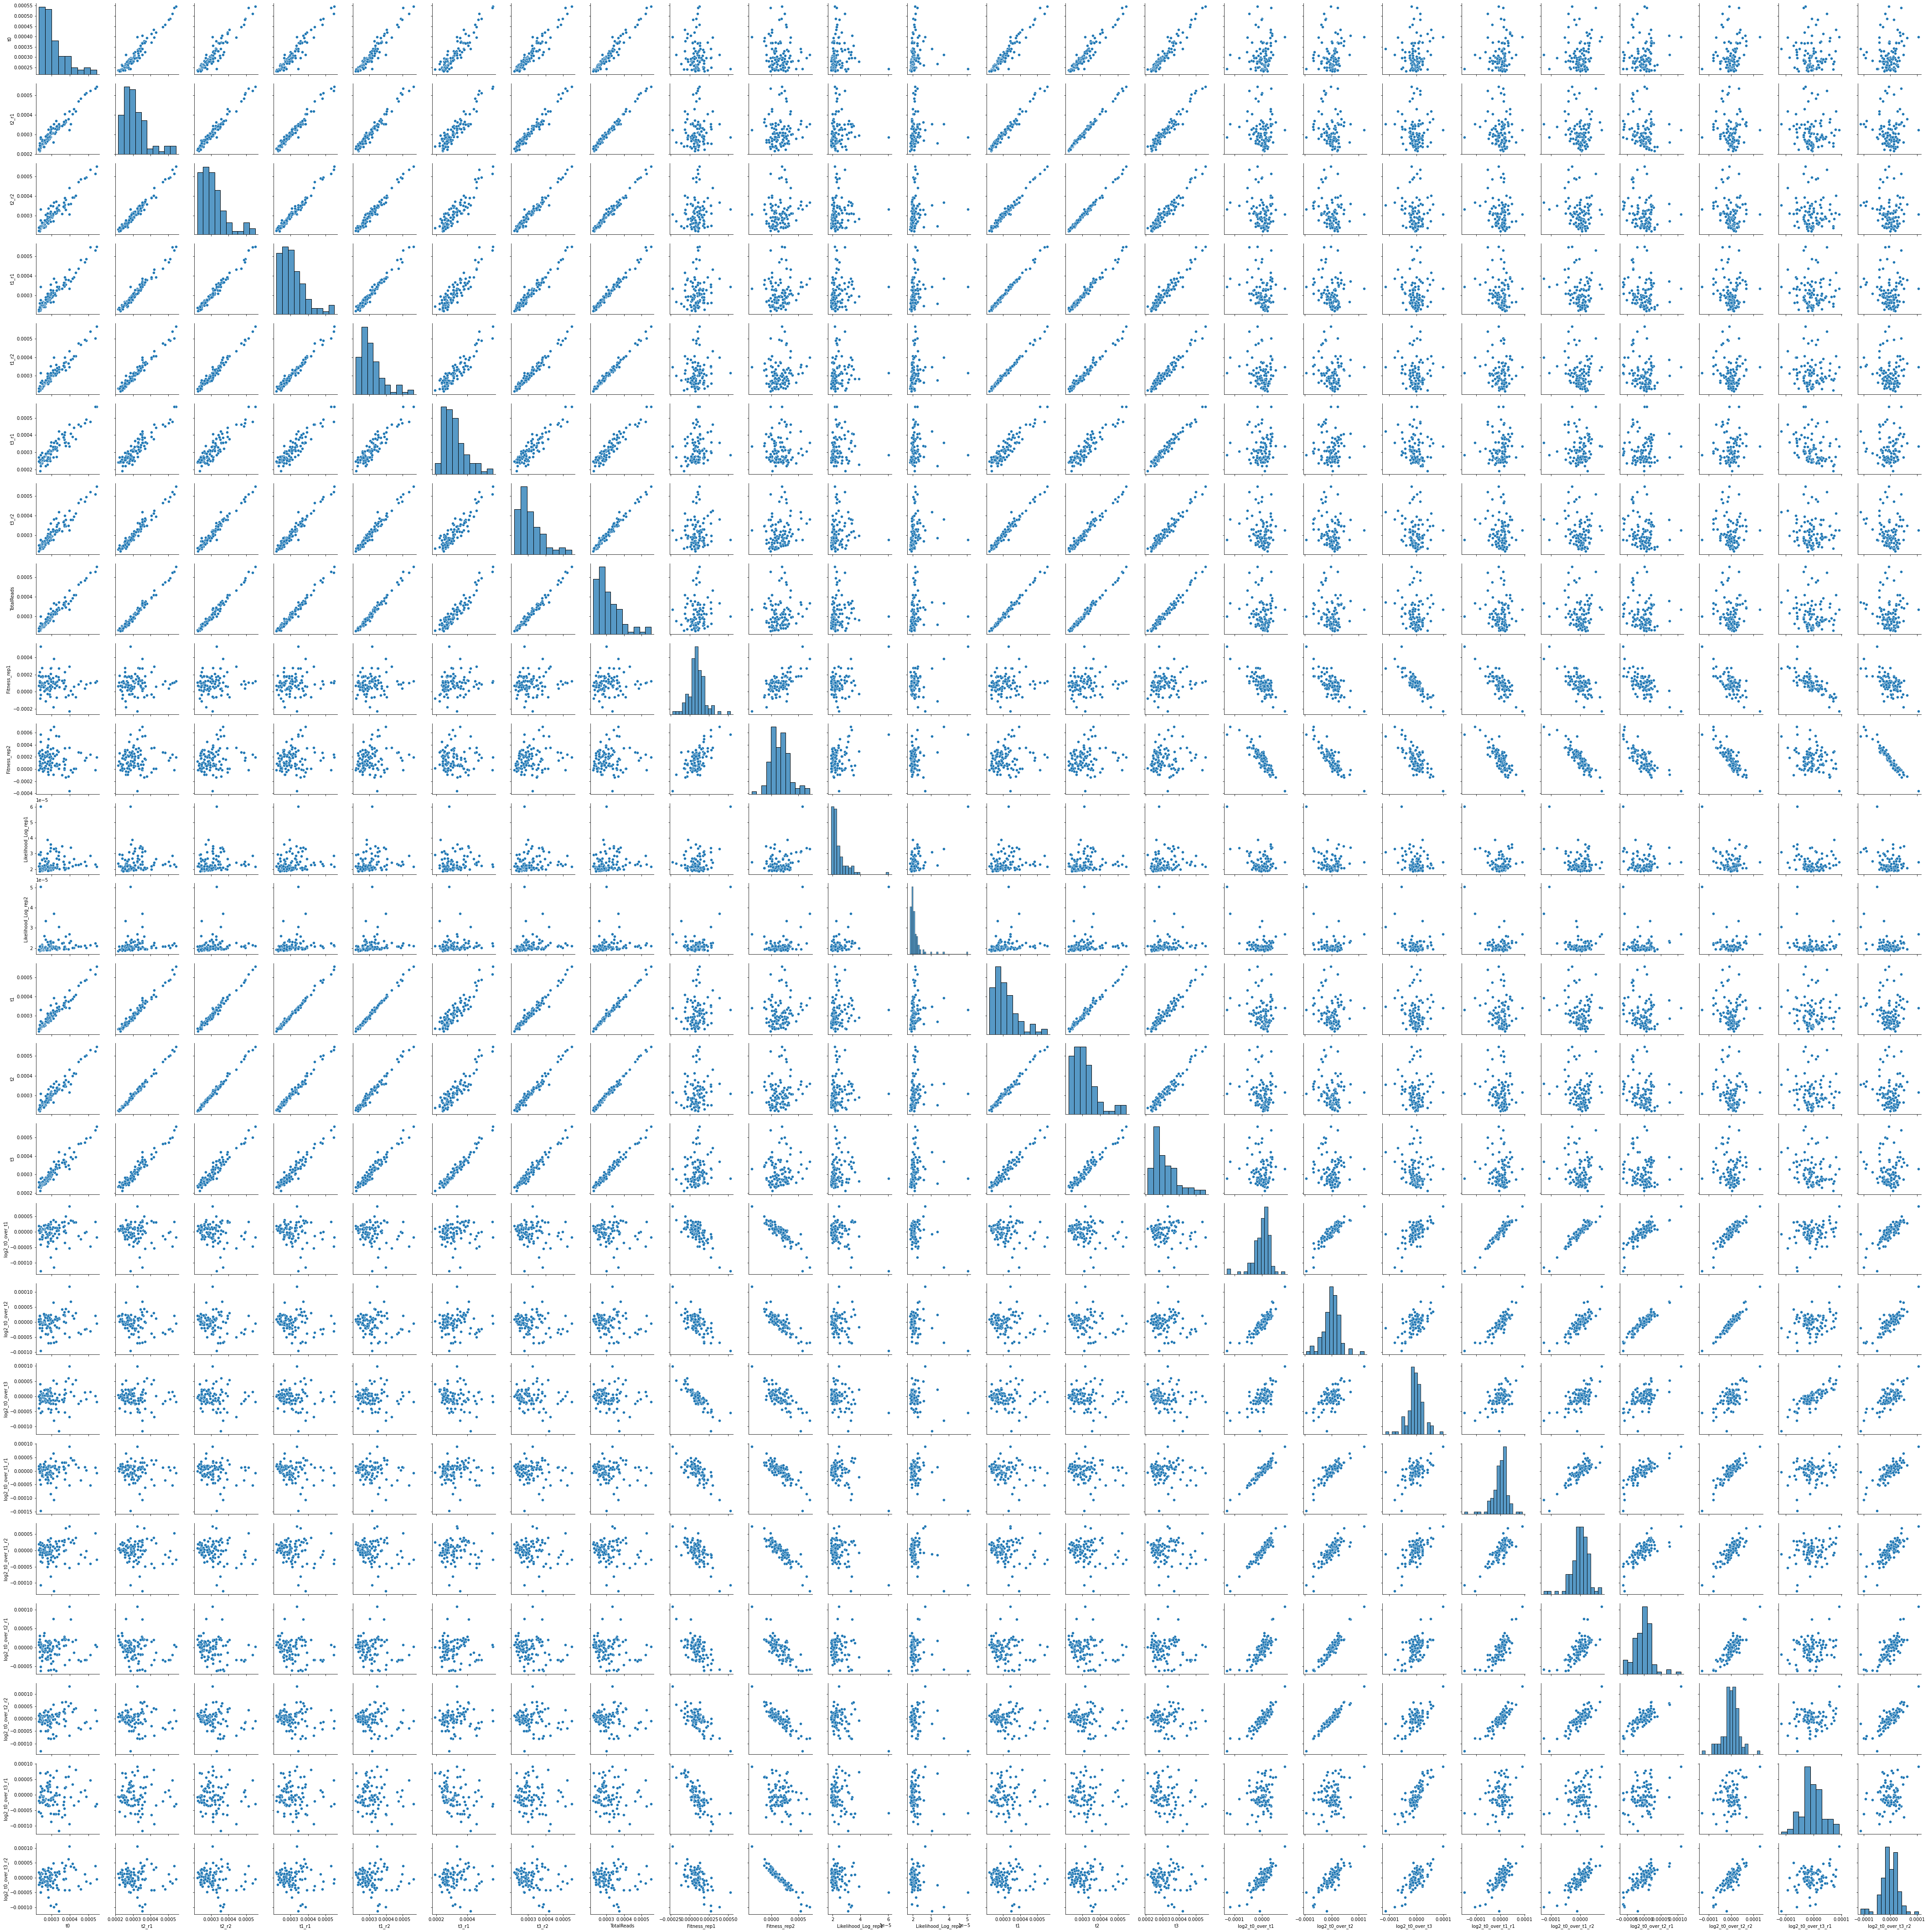

In [64]:
sns.pairplot(a[0:100])

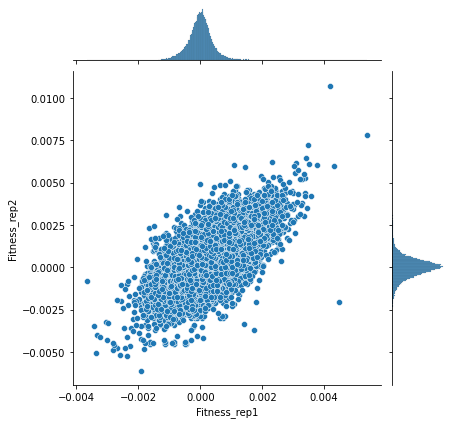

In [39]:
sns.jointplot(data=a,x='Fitness_rep1',y='Fitness_rep2',kind='scatter')

<Figure size 2304x864 with 0 Axes>

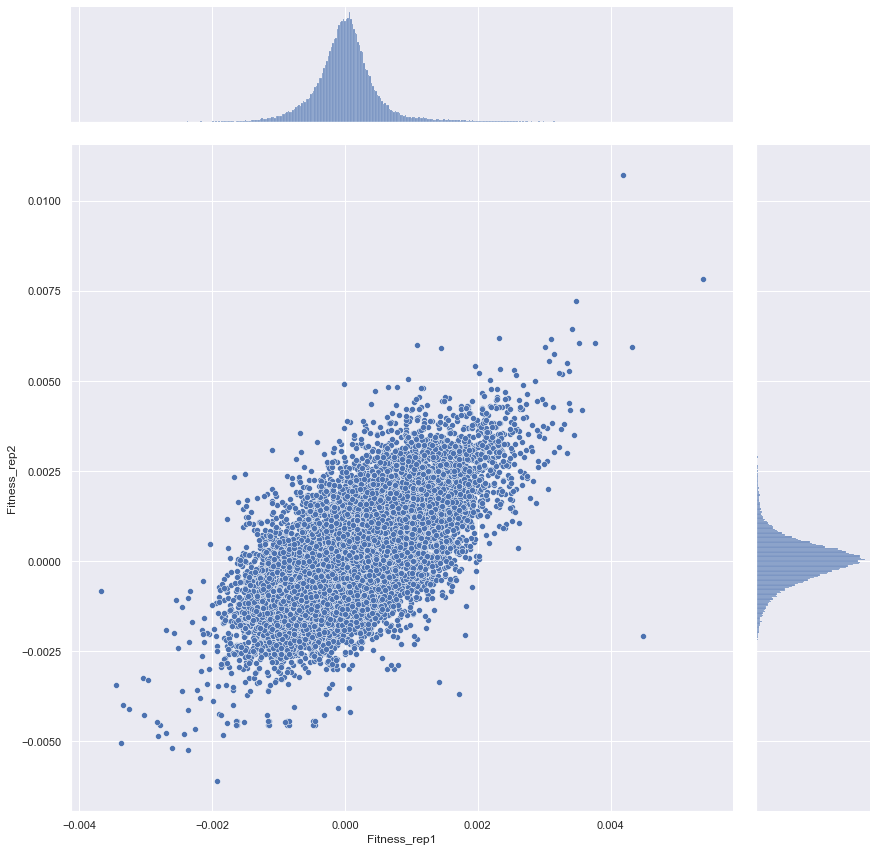

In [193]:
plt.figure(figsize=(32, 12))
sns.jointplot(data=a,x='Fitness_rep1',y='Fitness_rep2',kind='scatter', height=12)

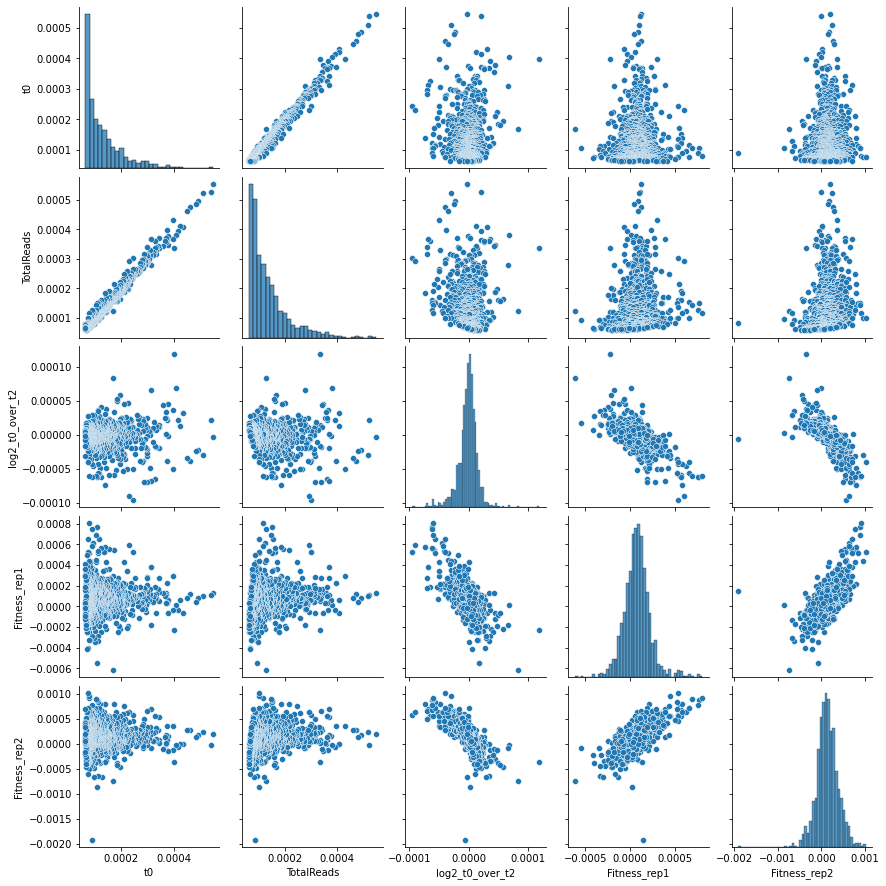

In [68]:
sns.pairplot(a.loc[0:1000,['t0','TotalReads','log2_t0_over_t2','Fitness_rep1','Fitness_rep2']])


In [174]:
t3 = df.loc[('t3','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t3'})
t2 = df.loc[('t2','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t2'})
t1 = df.loc[('t1','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t1'})
t0 = df.loc[('t0','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t0'})
g = t2.merge(t3,on='Sequence',how='inner')
g = g.merge(t1,on='Sequence',how='inner')
g = g.merge(t0,on='Sequence',how='inner')

<ipython-input-174-bdb777a952c9>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  t3 = df.loc[('t3','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t3'})
<ipython-input-174-bdb777a952c9>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  t2 = df.loc[('t2','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t2'})
<ipython-input-174-bdb777a952c9>:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  t1 = df.loc[('t1','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t1'})
<ipython-input-174-bdb777a952c9>:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  t0 = df.loc[('t0','Glu','rep1')].reset_index(drop=True).rename(columns={'NReads':'NReads_t0'})


In [175]:
g.fillna(0,inplace=True)
g.reset_index(drop=True,inplace=True)
# to integer
for cn in g.columns.values[1:]:
    g[cn] = g[cn].astype(int)

In [176]:
g['TotalReads'] = np.sum(g,axis=1)
g = g[g.TotalReads >= 100]
g = g[g.NReads_t0 >= 5]
g = g[g.NReads_t1 >= 5]
g = g[g.NReads_t2 >= 5]
g = g[g.NReads_t3 >= 5]

In [177]:
g['Freads_t0'] = g.NReads_t0 / np.sum(g.NReads_t0)
g['Freads_t1'] = g.NReads_t1 / np.sum(g.NReads_t1)
g['Freads_t2'] = g.NReads_t2 / np.sum(g.NReads_t2)
g['Freads_t3'] = g.NReads_t3 / np.sum(g.NReads_t3)
g['log2_t0_over_t3'] = np.log2(g['Freads_t0']/g['Freads_t3'])
g.sort_values('log2_t0_over_t3',ascending=False,inplace=True)

In [178]:
g

,Sequence,NReads_t2,NReads_t3,NReads_t1,NReads_t0,TotalReads,Freads_t0,Freads_t1,Freads_t2,Freads_t3,log2_t0_over_t3
116315,TAACATAGATGTGTATAAGAGACAGCCTCTGACATGAATCGTTCAT...,38,6,57,140,241,1.830513e-05,0.000008,0.000003,4.425140e-07,5.370381
56316,TAACATAGATGTGTATAAGAGACAGGGCGCTAAGTACGATTGCCGG...,209,10,174,226,619,2.954970e-05,0.000025,0.000019,7.375234e-07,5.324311
79448,TAACATAGATGTGTATAAGAGACAGCAATAAAGAAGGCTACCAGAC...,123,9,164,195,491,2.549643e-05,0.000023,0.000011,6.637711e-07,5.263465
46702,TAACATAGATGTGTATAAGAGACAGCAATCTCATCAATGGCTTCGT...,261,23,198,306,788,4.000977e-05,0.000028,0.000023,1.696304e-06,4.559886
97258,TAACATAGATGTGTATAAGAGACAGCCATTATCCTTCCTTGCGACG...,76,7,34,71,188,9.283314e-06,0.000005,0.000007,5.162664e-07,4.168452
...,...,...,...,...,...,...,...,...,...,...,...
95652,TAACATAGATGTGTATAAGAGACAGCATTTCGTCACGCCTGATTTC...,80,153,36,15,284,1.961263e-06,0.000005,0.000007,1.128411e-05,-2.524437
94050,TAACATAGATGTGTATAAGAGACAGGCAAATATTCCGATGCTTCCT...,84,113,51,10,258,1.307509e-06,0.000007,0.000008,8.334014e-06,-2.672191
111737,TAACATAGATGTGTATAAGAGACAGATAAGAAGGAGCTTTTACTTT...,46,68,27,6,147,7.845054e-07,0.000004,0.000004,5.015159e-06,-2.676440
127198,TAACATAGATGTGTATAAGAGACAGAGGTAAATAAAAAAGTGATTC...,13,334,15,12,374,1.569011e-06,0.000002,0.000001,2.463328e-05,-3.972682


In [179]:
g['Sequence'] = [re.sub('^TAACATAGATG','ATG',s) for s in g.Sequence]
g['Sequence'] = [re.sub('TAATTAATT','TAA',s) for s in g['Sequence']]
g['AA'] = [str(Seq(s).translate()) for s in g['Sequence']]

g.head(10)

/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,Sequence,NReads_t2,NReads_t3,NReads_t1,NReads_t0,TotalReads,Freads_t0,Freads_t1,Freads_t2,Freads_t3,log2_t0_over_t3,AA
116315,ATGTGTATAAGAGACAGCCTCTGACATGAATCGTTCATCTCACTTT...,38,6,57,140,241,0.000018,0.000008,0.000003,4.425140e-07,5.370381,MCIRDSL*HESFISLFSI*SIMT*NTSQLNFTFLLYLSLIHI*
56316,ATGTGTATAAGAGACAGGGCGCTAAGTACGATTGCCGGTACGTTTC...,209,10,174,226,619,0.000030,0.000025,0.000019,7.375234e-07,5.324311,MCIRDRALSTIAGTFLFKKIQAKVALNTLFTGSNVVAACSIAVSYTHL
79448,ATGTGTATAAGAGACAGCAATAAAGAAGGCTACCAGACGTTTCAGG...,123,9,164,195,491,0.000025,0.000023,0.000011,6.637711e-07,5.263465,MCIRDSNKEGYQTFQAANGLQALDIVTKERPDLCLLYTS
46702,ATGTGTATAAGAGACAGCAATCTCATCAATGGCTTCGTCTTTTTTC...,261,23,198,306,788,0.000040,0.000028,0.000023,1.696304e-06,4.559886,MCIRDSNLINGFVFFQFPFCNNRRQVERNSPVSYTHL
97258,ATGTGTATAAGAGACAGCCATTATCCTTCCTTGCGACGTAACAAAC...,76,7,34,71,188,0.000009,0.000005,0.000007,5.162664e-07,4.168452,MCIRDSHYPSLRRNKRRGNRNLLRKH*GAGRCDPRYLSLIHI*
120932,ATGTGTATAAGAGACAGCTGTACGACAGACCAAACAAGACGCATGT...,29,7,43,54,133,0.000007,0.000006,0.000003,5.162664e-07,3.773593,MCIRDSCTTDQTRRMFFSMRRSLACWSPFWPVSYTHL
126884,ATGTGTATAAGAGACAGAGCCTGTATGTCTTTCATTGTTTTATCAC...,14,10,34,77,135,0.000010,0.000005,0.000001,7.375234e-07,3.770919,MCIRDRACMSFIVLSLTKRNLLSSSYMLANSDTFDKLSLIHI*
20164,ATGTGTATAAGAGACAGTTATAGGACTTTGCTTTTTCAGGATTTTC...,837,92,698,680,2307,0.000089,0.000100,0.000075,6.785215e-06,3.711889,MCIRDSYRTLLFQDFQRSISKHPMDFDGPAAVSYTHL
127131,ATGTGTATAAGAGACAGTCCCCATTCTGTTCCTCCATTCATTTTTT...,14,9,32,64,119,0.000008,0.000005,0.000001,6.637711e-07,3.656135,MCIRDSPHSVPPFIFYYGSSFFAVFQSPVSYTHL
96820,ATGTGTATAAGAGACAGCAAACATTCTTACTGACGATACGATTTAT...,77,7,83,48,215,0.000006,0.000012,0.000007,5.162664e-07,3.603668,MCIRDSKHSY*RYDLYRP*MAEICDWAGRDTVSYTHL


In [49]:
a

,Sequence,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2,TotalReads,Fitness_rep1,...,t3,log2_t0_over_t1,log2_t0_over_t2,log2_t0_over_t3,log2_t0_over_t1_r1,log2_t0_over_t1_r2,log2_t0_over_t2_r1,log2_t0_over_t2_r2,log2_t0_over_t3_r1,log2_t0_over_t3_r2
0,TAACATAGATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTT...,5.457615e-04,0.000545,0.000552,0.000550,0.000565,5.662236e-04,0.000550,0.000553,0.000125,...,0.000558,-1.711583e-05,-0.000003,-0.000018,-6.694443e-06,-2.753713e-05,1.772023e-06,-0.000009,-2.950421e-05,-0.000006
1,TAACATAGATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGAT...,5.389493e-04,0.000534,0.000514,0.000530,0.000502,5.643400e-04,0.000511,0.000526,0.000109,...,0.000538,3.297965e-05,0.000022,0.000002,1.227874e-05,5.368085e-05,7.680082e-06,0.000036,-3.661081e-05,0.000040
2,TAACATAGATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCAT...,5.098665e-04,0.000524,0.000536,0.000547,0.000538,4.772214e-04,0.000523,0.000523,0.000103,...,0.000500,-4.658717e-05,-0.000029,0.000014,-5.319437e-05,-3.997994e-05,-1.988608e-05,-0.000038,4.707364e-05,-0.000019
3,TAACATAGATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCAT...,4.875958e-04,0.000511,0.000496,0.000486,0.000489,4.918197e-04,0.000497,0.000494,0.000086,...,0.000494,1.915132e-07,-0.000023,-0.000010,2.208129e-06,-1.825100e-06,-3.309235e-05,-0.000013,-6.090691e-06,-0.000013
4,TAACATAGATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAG...,4.814387e-04,0.000504,0.000493,0.000471,0.000496,4.710054e-04,0.000473,0.000484,0.000040,...,0.000472,-2.479174e-06,-0.000024,0.000014,1.536590e-05,-2.032403e-05,-3.259279e-05,-0.000016,1.504489e-05,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69706,TAACATAGATGTGTATAAGAGACAGTAGTATCTGCAATCAGATGCA...,6.550186e-07,0.000002,0.000002,0.000001,0.000002,1.506916e-06,0.000001,0.000002,0.001009,...,0.000001,-1.341033e-06,-0.000002,-0.000001,-5.582077e-07,-2.123857e-06,-1.930423e-06,-0.000002,-1.229027e-06,-0.000001
69707,TAACATAGATGTGTATAAGAGACAGTCATACAGGAACATAGCCGCA...,6.550186e-07,0.000003,0.000003,0.000002,0.000004,2.448738e-06,0.000003,0.000003,0.002313,...,0.000003,-2.832776e-06,-0.000003,-0.000003,-1.309807e-06,-4.355744e-06,-3.595134e-06,-0.000003,-2.587786e-06,-0.000003
69708,TAACATAGATGTGTATAAGAGACAGTCCTCACGCCGCACCCGGGCG...,6.550186e-07,0.000001,0.000002,0.000001,0.000002,5.650934e-07,0.000003,0.000002,0.000559,...,0.000002,-1.187313e-06,-0.000002,-0.000001,-8.087408e-07,-1.565885e-06,-1.173736e-06,-0.000002,1.297345e-07,-0.000003
69709,TAACATAGATGTGTATAAGAGACAGTGCTCAGGCTCCAATGAACCG...,6.550186e-07,0.000001,0.000002,0.000002,0.000003,2.166192e-06,0.000002,0.000002,0.002856,...,0.000002,-2.503997e-06,-0.000001,-0.000002,-2.186672e-06,-2.821322e-06,-7.197228e-07,-0.000002,-2.180159e-06,-0.000001


In [17]:
import regex

In [18]:
import re

In [57]:
a['Sequence'] = [re.sub('^TAACATAGATG','ATG',s) for s in a['Sequence']]
a['Sequence'] = [re.sub('TAATTAATT','TAA',s) for s in a['Sequence']]
a['AA'] = [str(Seq(s).translate()) for s in a['Sequence']]

a.head()

/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,Sequence,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2,TotalReads,Fitness_rep1,...,log2_t0_over_t1,log2_t0_over_t2,log2_t0_over_t3,log2_t0_over_t1_r1,log2_t0_over_t1_r2,log2_t0_over_t2_r1,log2_t0_over_t2_r2,log2_t0_over_t3_r1,log2_t0_over_t3_r2,AA
0,ATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTTTTTCTTGT...,0.000546,0.000545,0.000552,0.000550,0.000565,0.000566,0.000550,0.000553,0.000125,...,-1.711583e-05,-0.000003,-0.000018,-0.000007,-0.000028,0.000002,-0.000009,-0.000030,-0.000006,MCIRDRYGRRVRFFLFSLSFSVQTAKTCFSQYVQGYTYAVSYTHL
1,ATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGATAAGCATCC...,0.000539,0.000534,0.000514,0.000530,0.000502,0.000564,0.000511,0.000526,0.000109,...,3.297965e-05,0.000022,0.000002,0.000012,0.000054,0.000008,0.000036,-0.000037,0.000040,MCIRDRSHSEQRISIRG*LRCTNEKAMSAQVNKTLAKGICCLLYTS
2,ATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAA...,0.000510,0.000524,0.000536,0.000547,0.000538,0.000477,0.000523,0.000523,0.000103,...,-4.658717e-05,-0.000029,0.000014,-0.000053,-0.000040,-0.000020,-0.000038,0.000047,-0.000019,MCIRDRLQVIKSIAEKQTTMIIVTHEMAFAKEVADKAVSYTHL
3,ATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCATTCTTCAAC...,0.000488,0.000511,0.000496,0.000486,0.000489,0.000492,0.000497,0.000494,0.000086,...,1.915132e-07,-0.000023,-0.000010,0.000002,-0.000002,-0.000033,-0.000013,-0.000006,-0.000013,MCIRDRC*SVGCILQPKLFYHRRPCRFILSLIHI*
4,ATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAGACCGCGGA...,0.000481,0.000504,0.000493,0.000471,0.000496,0.000471,0.000473,0.000484,0.000040,...,-2.479174e-06,-0.000024,0.000014,0.000015,-0.000020,-0.000033,-0.000016,0.000015,0.000012,MCIRDRDDSGCKRPRNAN*RYIRTKNPCSCRHG*LSLIHI*


In [129]:
temp1 = a.groupby('AA')['Sequence'].count().sort_values(ascending=False)
temp1=pd.DataFrame(temp1[temp1==1])
temp1
temp1 = a.merge(temp1,on='AA',how='inner')

In [145]:
q = a.groupby('AA')['Sequence'].count().sort_values(ascending=False)
q = pd.DataFrame(q[q==2])
q = a.merge(q,on='AA',how='inner')
print(q.head())

                                          Sequence_x        t0     t2_r1  \
0  ATGTGTATAAGAGACAGGTCTTAGACACACTTGATCAGCTGCCAAC...  0.000037  0.000037   
1  ATGTGTATAAGAGACAGGTCTTAGACACACTTAATCAGCTGCCAAC...  0.000034  0.000030   
2  ATGTGTATAAGAGACAGTGCAACGACAGCATCCCAGAATGAGATTC...  0.000026  0.000028   
3  ATGTGTATAAGAGACAGCGCAACGACAGCATCCCAGAATGAGATTC...  0.000008  0.000008   
4  ATGTGTATAAGAGACAGCCTCATAGCCGAACAATTCTGATTCGAGG...  0.000024  0.000013   

      t2_r2     t1_r1     t1_r2     t3_r1     t3_r2  TotalReads  Fitness_rep1  \
0  0.000038  0.000037  0.000039  0.000038  0.000035    0.000037      0.000067   
1  0.000033  0.000033  0.000037  0.000034  0.000032    0.000033      0.000078   
2  0.000026  0.000024  0.000026  0.000030  0.000030    0.000027      0.000080   
3  0.000008  0.000007  0.000007  0.000007  0.000009    0.000008     -0.000301   
4  0.000024  0.000015  0.000017  0.000003  0.000024    0.000017     -0.001771   

   ...  log2_t0_over_t2_r2  log2_t0_over_t3_r1  log2_t0_

In [144]:
a['Freads_t0'] = a.t0 / np.sum(a.t0)
a['Freads_t3'] = a.t3 / np.sum(a.t3)
a['Freads_Ara_t3'] = (a.t3_r2 + a.t3_r1) / (np.sum(a.t3_r2) + np.sum(a.t3_r1))
a['Freads_Ara_t2'] = (a.t2_r2 + a.t2_r1) / (np.sum(a.t2_r2) + np.sum(a.t2_r1))
a['Freads_Ara_t1'] = (a.t1_r2 + a.t1_r1) / (np.sum(a.t1_r2) + np.sum(a.t1_r1))

In [140]:
a

,Sequence,t0,t2_r1,t2_r2,t1_r1,t1_r2,t3_r1,t3_r2,TotalReads,Fitness_rep1,...,log2_t0_over_t1_r2,log2_t0_over_t2_r1,log2_t0_over_t2_r2,log2_t0_over_t3_r1,log2_t0_over_t3_r2,AA,Freads_t0,Freads_t3,Freads_Ara_t3,Freads_Ara_t1
0,ATGTGTATAAGAGACAGATATGGAAGAAGGGTTAGGTTTTTCTTGT...,5.457615e-04,0.000545,0.000552,0.000550,0.000565,5.662236e-04,0.000550,0.000553,0.000125,...,-2.753713e-05,1.772023e-06,-8.722313e-06,-2.950421e-05,-5.532002e-06,MCIRDRYGRRVRFFLFSLSFSVQTAKTCFSQYVQGYTYAVSYTHL,5.457615e-04,0.000558,0.000558,0.000558
1,ATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGATAAGCATCC...,5.389493e-04,0.000534,0.000514,0.000530,0.000502,5.643400e-04,0.000511,0.000526,0.000109,...,5.368085e-05,7.680082e-06,3.561918e-05,-3.661081e-05,4.011374e-05,MCIRDRSHSEQRISIRG*LRCTNEKAMSAQVNKTLAKGICCLLYTS,5.389493e-04,0.000538,0.000538,0.000516
2,ATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAA...,5.098665e-04,0.000524,0.000536,0.000547,0.000538,4.772214e-04,0.000523,0.000523,0.000103,...,-3.997994e-05,-1.988608e-05,-3.838186e-05,4.707364e-05,-1.872265e-05,MCIRDRLQVIKSIAEKQTTMIIVTHEMAFAKEVADKAVSYTHL,5.098665e-04,0.000500,0.000500,0.000542
3,ATGTGTATAAGAGACAGATGTTGATCCGTGGGCTGCATTCTTCAAC...,4.875958e-04,0.000511,0.000496,0.000486,0.000489,4.918197e-04,0.000497,0.000494,0.000086,...,-1.825100e-06,-3.309235e-05,-1.253904e-05,-6.090691e-06,-1.291778e-05,MCIRDRC*SVGCILQPKLFYHRRPCRFILSLIHI*,4.875958e-04,0.000494,0.000494,0.000487
4,ATGTGTATAAGAGACAGGGATGATTCAGGATGCAAGAGACCGCGGA...,4.814387e-04,0.000504,0.000493,0.000471,0.000496,4.710054e-04,0.000473,0.000484,0.000040,...,-2.032403e-05,-3.259279e-05,-1.621771e-05,1.504489e-05,1.233118e-05,MCIRDRDDSGCKRPRNAN*RYIRTKNPCSCRHG*LSLIHI*,4.814387e-04,0.000472,0.000472,0.000483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69686,ATGTGTATAAGAGACAGCCATCCGCTGTTTTGACGACCTCCGCCGT...,6.550186e-07,0.000001,0.000001,0.000003,0.000001,1.036005e-06,0.000001,0.000001,0.002878,...,-7.289268e-07,-5.683852e-07,-8.975675e-07,-5.496462e-07,-7.893119e-07,MCIRDSHPLF*RPPPFLLYIQ*PLTLSLIHI*,6.550186e-07,0.000001,0.000001,0.000002
69687,ATGTGTATAAGAGACAGCTATGGGGATGACTGGCGGTGAAGTTGCA...,6.550186e-07,0.000001,0.000002,0.000002,0.000002,7.534579e-07,0.000002,0.000001,0.001718,...,-1.705378e-06,-1.022398e-06,-1.439496e-06,-1.420178e-07,-1.331281e-06,MCIRDSYGDDWR*SCIGGFIWRDRHGNR*ILLPFLYDLSLIHI*,6.550186e-07,0.000001,0.000001,0.000002
69688,ATGTGTATAAGAGACAGCTCCTGAGGAGCGGCTTTTTTTAATGAAA...,6.550186e-07,0.000002,0.000001,0.000003,0.000001,1.412734e-06,0.000003,0.000002,0.003114,...,-8.684199e-07,-2.081761e-06,-7.891817e-07,-1.093151e-06,-3.173976e-06,MCIRDSS*GAAFFNETFV*T**AYFFSRIF*KAAVSYTHL,6.550186e-07,0.000002,0.000002,0.000002
69690,ATGTGTATAAGAGACAGGAAGTATGTTGATCCTCATAAAGAAGCTG...,6.550186e-07,0.000001,0.000002,0.000002,0.000002,1.977827e-06,0.000001,0.000002,0.002485,...,-2.123857e-06,-8.710604e-07,-1.656268e-06,-1.908407e-06,-1.006100e-06,MCIRDRKYVDPHKEAADLYIANHVKPGDIVVTQDIGLAVSYTHL,6.550186e-07,0.000002,0.000002,0.000002


In [147]:
q.Freads_Ara_t1[list(range(0,len(q),2))]

0     0.000038
2     0.000025
4     0.000016
6     0.000011
8     0.000009
10    0.000005
12    0.000005
14    0.000006
16    0.000002
18    0.000004
20    0.000004
22    0.000002
24    0.000003
26    0.000002
Name: Freads_Ara_t1, dtype: float64

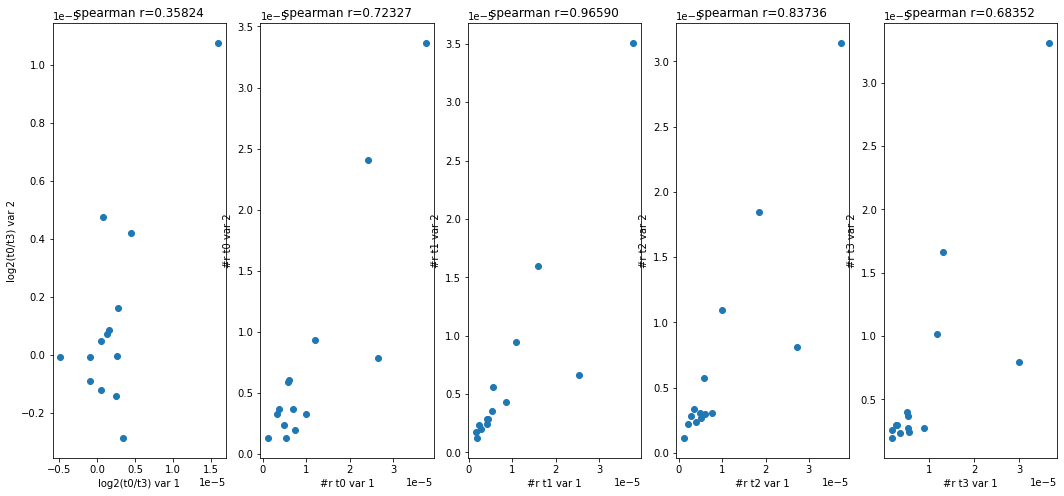

In [150]:
fix,ax = plt.subplots(1,5,figsize=(18,8))

x0 = q.log2_t0_over_t3[list(range(0,len(q),2))]
x1 = q.log2_t0_over_t3[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[0].scatter(x0,x1)
ax[0].set_xlabel('log2(t0/t3) var 1')
ax[0].set_ylabel('log2(t0/t3) var 2')
ax[0].set_title(f'spearman r={r:0.5f}')

x0 = q.Freads_t0[list(range(0,len(q),2))]
x1 = q.Freads_t0[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[1].scatter(x0,x1)
ax[1].set_xlabel('#r t0 var 1')
ax[1].set_ylabel('#r t0 var 2')
ax[1].set_title(f'spearman r={r:0.5f}')

x0 = q.Freads_Ara_t1[list(range(0,len(q),2))]
x1 = q.Freads_Ara_t1[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[2].scatter(x0,x1)
ax[2].set_xlabel('#r t1 var 1')
ax[2].set_ylabel('#r t1 var 2')
ax[2].set_title(f'spearman r={r:0.5f}')

x0 = q.Freads_Ara_t2[list(range(0,len(q),2))]
x1 = q.Freads_Ara_t2[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[3].scatter(x0,x1)
ax[3].set_xlabel('#r t2 var 1')
ax[3].set_ylabel('#r t2 var 2')
ax[3].set_title(f'spearman r={r:0.5f}')

x0 = q.Freads_Ara_t3[list(range(0,len(q),2))]
x1 = q.Freads_Ara_t3[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[4].scatter(x0,x1)
ax[4].set_xlabel('#r t3 var 1')
ax[4].set_ylabel('#r t3 var 2')
ax[4].set_title(f'spearman r={r:0.5f}')

plt.savefig('/Users/xuanyuanqiao/Desktop/analysis/arabinose_synonymous_variants.png',dpi=600)


In [131]:
len(temp1)

69327

Text(0.5, 1.0, 'spearman r=0.94786')

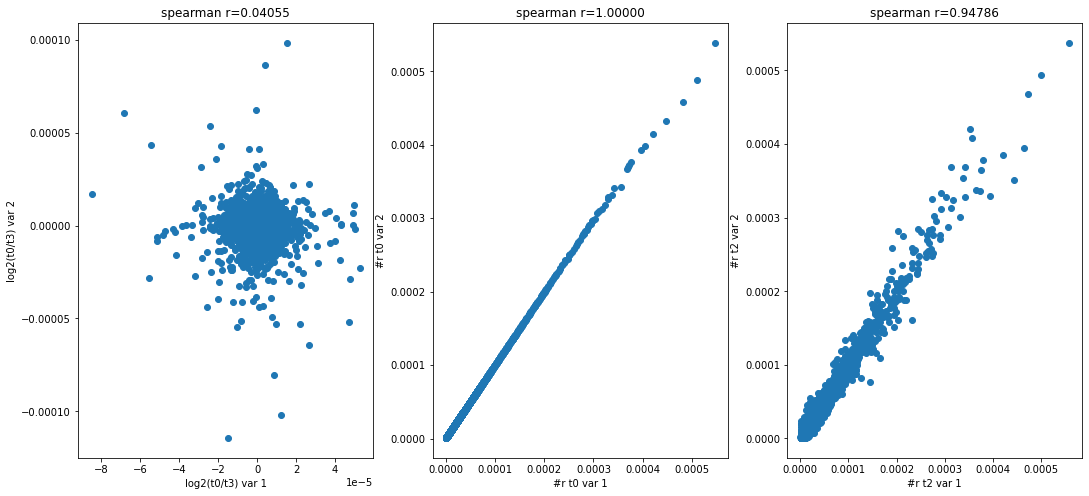

In [132]:
fix,ax = plt.subplots(1,3,figsize=(18,8))

x0 = temp1.log2_t0_over_t3[list(range(0,len(temp1)-1,2))]
x1 = temp1.log2_t0_over_t3[list(range(1,len(temp1)-1,2))]
r,p = spearmanr(x0,x1)
ax[0].scatter(x0,x1)
ax[0].set_xlabel('log2(t0/t3) var 1')
ax[0].set_ylabel('log2(t0/t3) var 2')
ax[0].set_title(f'spearman r={r:0.5f}')

x0 = temp1.Freads_t0[list(range(0,len(temp1)-1,2))]
x1 = temp1.Freads_t0[list(range(1,len(temp1)-1,2))]
r,p = spearmanr(x0,x1)
ax[1].scatter(x0,x1)
ax[1].set_xlabel('#r t0 var 1')
ax[1].set_ylabel('#r t0 var 2')
ax[1].set_title(f'spearman r={r:0.5f}')

x0 = temp1.Freads_Ara_t3[list(range(0,len(temp1)-1,2))]
x1 = temp1.Freads_Ara_t3[list(range(1,len(temp1)-1,2))]
r,p = spearmanr(x0,x1)
ax[2].scatter(x0,x1)
ax[2].set_xlabel('#r t2 var 1')
ax[2].set_ylabel('#r t2 var 2')
ax[2].set_title(f'spearman r={r:0.5f}')



In [157]:
g

,Sequence,NReads_t0,NReads_t3,Freads_t0,Freads_t3,log2_t0_over_t3,AA
2,ATGGAAGAAGGGTTAGGTTTTTCTTGTTTTCTTTGTCTTTCAGTGT...,4166,1,3.445859e-04,5.979384e-08,12.492579,MEEGLGFSCFLCLSVFKLPKRVFLSMFRGTHTLSLIHI*
3,ATGGAAGAAGGGTTAGGTTTTTCTTGTTTTCTTTGTCTTTCAGTGT...,4166,1,3.445859e-04,5.979384e-08,12.492579,MEEGLGFSCFLCLSVFKLPKRVFLSMFRGTHTLSLIHI*
4,ATGGAAGAAGGGTTAGGTTTTTCTTGTTTTCTTTGTCTTTCAGTGT...,4166,1,3.445859e-04,5.979384e-08,12.492579,MEEGLGFSCFLCLSVFKLPKRVFLSMFRGTHTLSLIHI*
1,ATGGAAGAAGGGTTAGGTTTTTCTTGTTTTCTTTGTCTTTCAGTGT...,4166,1,3.445859e-04,5.979384e-08,12.492579,MEEGLGFSCFLCLSVFKLPKRVFLSMFRGTHTLSLIHI*
15,ATGTGTATAAGAGACAGGTCTCACTCGGAACAGCGGATAAGCATCC...,4114,1,3.402848e-04,5.979384e-08,12.474458,MCIRDRSHSEQRISIRG*LRCTNEKAMSAQVNKTLAKGICCLLYTS
...,...,...,...,...,...,...,...
50,ATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAA...,1,7287,8.271385e-08,4.357177e-04,-12.362977,MCIRDRLQVIKSIAEKQTTMIIVTHEMAFAKEVADKAVSYTHL
43,ATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAA...,1,7287,8.271385e-08,4.357177e-04,-12.362977,MCIRDRLQVIKSIAEKQTTMIIVTHEMAFAKEVADKAVSYTHL
36,ATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAA...,1,7287,8.271385e-08,4.357177e-04,-12.362977,MCIRDRLQVIKSIAEKQTTMIIVTHEMAFAKEVADKAVSYTHL
29,ATGTGTATAAGAGACAGGCTTCAGGTCATCAAGTCCATTGCGGAAA...,1,7287,8.271385e-08,4.357177e-04,-12.362977,MCIRDRLQVIKSIAEKQTTMIIVTHEMAFAKEVADKAVSYTHL


In [158]:
q = g.groupby('AA')['Sequence'].count().sort_values(ascending=False)
q = pd.DataFrame(q[q==2])
q = g.merge(q,on='AA',how='inner')
print(q.head())

                                          Sequence_x  NReads_t0  NReads_t3  \
0  ATGTGTATAAGAGACAGCTATACAACCAGAATAAGAGATGCACAGA...       2509          1   
1  ATGTGTATAAGAGACAGCTATACAACCAGAATAAGAGATGCACAGA...       2509       4332   
2  ATGTGTATAAGAGACAGACCAAAGACTGTCGTTCAAATCACAGCCC...       2143          1   
3  ATGTGTATAAGAGACAGACCAAAGACTGTCGTTCAAATCACAGCCC...       2143       3790   
4  ATGTGTATAAGAGACAGGGCATGTTCATCTTCTTCAAATAAAACTA...       2129          1   

   Freads_t0     Freads_t3  log2_t0_over_t3  \
0   0.000208  5.979384e-08        11.761029   
1   0.000208  2.590269e-04        -0.319789   
2   0.000177  5.979384e-08        11.533548   
3   0.000177  2.266187e-04        -0.354434   
4   0.000176  5.979384e-08        11.524092   

                                            AA  Sequence_y  
0          MCIRDSYTTRIRDAQNN*P*TTIIPRRVLSLIHI*           2  
1          MCIRDSYTTRIRDAQNN*P*TTIIPRRVLSLIHI*           2  
2  MCIRDRPKTVVQITALAFKLGRHGAV*HNKRICI*YLSLIHI*           2  
3  M

In [159]:
q

,Sequence_x,NReads_t0,NReads_t3,Freads_t0,Freads_t3,log2_t0_over_t3,AA,Sequence_y
0,ATGTGTATAAGAGACAGCTATACAACCAGAATAAGAGATGCACAGA...,2509,1,2.075290e-04,5.979384e-08,11.761029,MCIRDSYTTRIRDAQNN*P*TTIIPRRVLSLIHI*,2
1,ATGTGTATAAGAGACAGCTATACAACCAGAATAAGAGATGCACAGA...,2509,4332,2.075290e-04,2.590269e-04,-0.319789,MCIRDSYTTRIRDAQNN*P*TTIIPRRVLSLIHI*,2
2,ATGTGTATAAGAGACAGACCAAAGACTGTCGTTCAAATCACAGCCC...,2143,1,1.772558e-04,5.979384e-08,11.533548,MCIRDRPKTVVQITALAFKLGRHGAV*HNKRICI*YLSLIHI*,2
3,ATGTGTATAAGAGACAGACCAAAGACTGTCGTTCAAATCACAGCCC...,2143,3790,1.772558e-04,2.266187e-04,-0.354434,MCIRDRPKTVVQITALAFKLGRHGAV*HNKRICI*YLSLIHI*,2
4,ATGTGTATAAGAGACAGGGCATGTTCATCTTCTTCAAATAAAACTA...,2129,1,1.760978e-04,5.979384e-08,11.524092,MCIRDRACSSSSNKTSFLALFIIFTKVSYCLLYTS,2
...,...,...,...,...,...,...,...,...
24245,ATGTGTATAAGAGACAGATTCAAAACGCCCCCTTCAAAAGGGGGCG...,1,11,8.271385e-08,6.577322e-07,-2.991300,MCIRDRFKTPPSKGGVCVSQRFTNSSSFSSFASCFFRKALRLSLIHI*,2
24246,ATGTGTATAAGAGACAGGTCTGACTGCGGATGCGATCTTTTGAATC...,3,37,2.481415e-07,2.212372e-06,-3.156359,MCIRDRSDCGCDLLNQIGCNTSLFFCSRGLFYIAWRSTELVEHCLLYTS,2
24247,ATGTGTATAAGAGACAGGTCTGACTGCGGATGCGATCTTTTGAATC...,1,37,8.271385e-08,2.212372e-06,-4.741321,MCIRDRSDCGCDLLNQIGCNTSLFFCSRGLFYIAWRSTELVEHCLLYTS,2
24248,ATGTGTATAAGAGACAGTCGTAACCCTGTACGGCTGTAAAAATACG...,2,72,1.654277e-07,4.305156e-06,-4.701793,MCIRDSRNPVRL*KYGTTDHGQACMPKHLLRRKSARVCLLYTS,2


                                          Sequence_x  NReads_t2  NReads_t3  \
0  ATGTGTATAAGAGACAGGTCCATTGTAGCACGTGTGTAGCCCAGGT...        209         70   
1  ATGTGTATAAGAGACAGGTCCATTGTAGCACGTGTGTAGCCCAGGT...        209        160   
2  ATGTGTATAAGAGACAGGCCGAACCAAATTAAAGCCCCTCCTAAGA...        122         55   
3  ATGTGTATAAGAGACAGGCCGAACCAAATTAAAGCCCCTCCTAAGA...        122        104   
4  ATGTGTATAAGAGACAGCGCAAAATCAAAGCCAACAGCAAAATGGC...        113         69   

   NReads_t1  NReads_t0  TotalReads  Freads_t0  Freads_t1  Freads_t2  \
0        147        141         567   0.000018   0.000021   0.000019   
1        147        141         657   0.000018   0.000021   0.000019   
2         65         74         316   0.000010   0.000009   0.000011   
3         65         74         365   0.000010   0.000009   0.000011   
4         69         84         335   0.000011   0.000010   0.000010   

   Freads_t3  log2_t0_over_t3                                             AA  \
0   0.000005      

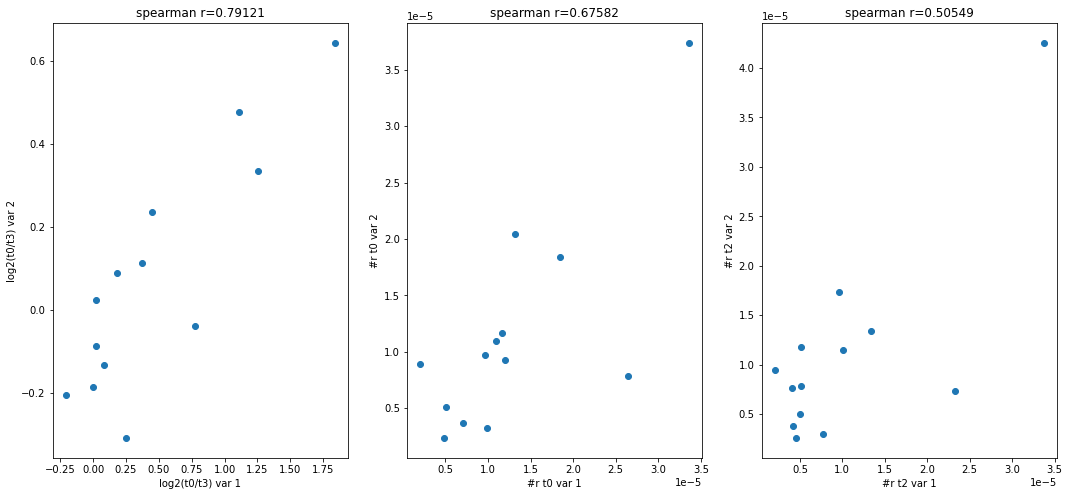

In [181]:
q = g.groupby('AA')['Sequence'].count().sort_values(ascending=False)
q = pd.DataFrame(q[q==2])
q = g.merge(q,on='AA',how='inner')
print(q.head())

fix,ax = plt.subplots(1,3,figsize=(18,8))


x0 = q.log2_t0_over_t3[list(range(0,len(q),2))]
x1 = q.log2_t0_over_t3[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[0].scatter(x0,x1)
ax[0].set_xlabel('log2(t0/t3) var 1')
ax[0].set_ylabel('log2(t0/t3) var 2')
ax[0].set_title(f'spearman r={r:0.5f}')

x0 = q.Freads_t0[list(range(0,len(q),2))]
x1 = q.Freads_t0[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[1].scatter(x0,x1)
ax[1].set_xlabel('#r t0 var 1')
ax[1].set_ylabel('#r t0 var 2')
ax[1].set_title(f'spearman r={r:0.5f}')

x0 = q.Freads_t3[list(range(0,len(q),2))]
x1 = q.Freads_t3[list(range(1,len(q),2))]
r,p = spearmanr(x0,x1)
ax[2].scatter(x0,x1)
ax[2].set_xlabel('#r t2 var 1')
ax[2].set_ylabel('#r t2 var 2')
ax[2].set_title(f'spearman r={r:0.5f}')

plt.savefig('/Users/xuanyuanqiao/Desktop/analysis/glucose_synonymous_variants.png',dpi=600)
